<a href="https://colab.research.google.com/github/aisha7da/Task5-internship/blob/main/intership_task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-sql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import sqlite3

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (4).json to kaggle (4).json


{'kaggle (4).json': b'{"username":"aishaalizada","key":"f607d6318489182f4670869c9f7586a4"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp 'kaggle.json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ranasabrii/chinook
!unzip Chinook_Sqlite.sqlite.zip

Dataset URL: https://www.kaggle.com/datasets/ranasabrii/chinook
License(s): unknown
  0% 0.00/438k [00:00<?, ?B/s]
100% 438k/438k [00:00<00:00, 490MB/s]
Archive:  Chinook_Sqlite.sqlite.zip
  inflating: Chinook_Sqlite.sqlite   


In [ ]:
conn = sqlite3.connect("Chinook_Sqlite.sqlite")

In [ ]:
!ls

 Chinook_Sqlite.sqlite	     chinook.zip        kaggle.json
 Chinook_Sqlite.sqlite.zip  'kaggle (4).json'   sample_data


In [ ]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,Album
1,Artist
2,Customer
3,Employee
4,Genre
5,Invoice
6,InvoiceLine
7,MediaType
8,Playlist
9,PlaylistTrack


In [ ]:
pd.read_sql("SELECT * FROM Customer LIMIT 5;", conn)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [ ]:
pd.read_sql("SELECT * FROM Invoice LIMIT 5;", conn)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86


In [ ]:
pd.read_sql("SELECT * FROM InvoiceLine LIMIT 5;", conn)

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1


In [ ]:
pd.read_sql("SELECT * FROM Track LIMIT 5;", conn)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [ ]:
tables = ["Customer", "Invoice", "InvoiceLine", "Track"]

for table in tables:
    print(f"--- {table} ---")
    display(pd.read_sql(f"SELECT * FROM {table} LIMIT 5;", conn))

--- Customer ---


,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


--- Invoice ---


,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86


--- InvoiceLine ---


,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1


--- Track ---


,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [ ]:
for t in tables:
    count = pd.read_sql(f"SELECT COUNT(*) as count FROM {t};", conn)
    print(f"{t}: {count['count'][0]} rows")

Customer: 59 rows
Invoice: 412 rows
InvoiceLine: 2240 rows
Track: 3503 rows


In [ ]:
pd.read_sql("""
SELECT InvoiceId, CustomerId, InvoiceDate, BillingCountry, Total
FROM Invoice
LIMIT 10;
""", conn)

,InvoiceId,CustomerId,InvoiceDate,BillingCountry,Total
0,1,2,2009-01-01 00:00:00,Germany,1.98
1,2,4,2009-01-02 00:00:00,Norway,3.96
2,3,8,2009-01-03 00:00:00,Belgium,5.94
3,4,14,2009-01-06 00:00:00,Canada,8.91
4,5,23,2009-01-11 00:00:00,USA,13.86
5,6,37,2009-01-19 00:00:00,Germany,0.99
6,7,38,2009-02-01 00:00:00,Germany,1.98
7,8,40,2009-02-01 00:00:00,France,1.98
8,9,42,2009-02-02 00:00:00,France,3.96
9,10,46,2009-02-03 00:00:00,Ireland,5.94


In [ ]:
pd.read_sql("""
SELECT InvoiceLineId, InvoiceId, TrackId, UnitPrice, Quantity
FROM InvoiceLine
LIMIT 10;
""", conn)

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1
5,6,2,12,0.99,1
6,7,3,16,0.99,1
7,8,3,20,0.99,1
8,9,3,24,0.99,1
9,10,3,28,0.99,1


In [ ]:
pd.read_sql("""
SELECT TrackId, Name, AlbumId, GenreId, UnitPrice
FROM Track
LIMIT 10;
""", conn)

,TrackId,Name,AlbumId,GenreId,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,0.99
1,2,Balls to the Wall,2,1,0.99
2,3,Fast As a Shark,3,1,0.99
3,4,Restless and Wild,3,1,0.99
4,5,Princess of the Dawn,3,1,0.99
5,6,Put The Finger On You,1,1,0.99
6,7,Let's Get It Up,1,1,0.99
7,8,Inject The Venom,1,1,0.99
8,9,Snowballed,1,1,0.99
9,10,Evil Walks,1,1,0.99


In [ ]:
pd.read_sql("SELECT SUM(Total) as TotalRevenue FROM Invoice;", conn)

,TotalRevenue
0,2328.6


In [ ]:
pd.read_sql("""
SELECT BillingCountry, COUNT(*) as NumInvoices
FROM Invoice
GROUP BY BillingCountry
ORDER BY NumInvoices DESC;
""", conn)

,BillingCountry,NumInvoices
0,USA,91
1,Canada,56
2,France,35
3,Brazil,35
4,Germany,28
5,United Kingdom,21
6,Portugal,14
7,Czech Republic,14
8,India,13
9,Sweden,7


In [ ]:
pd.read_sql("SELECT AVG(Total) as AvgInvoice FROM Invoice;", conn)

,AvgInvoice
0,5.651942


#Top-Selling Products

In [ ]:
pd.read_sql("""
SELECT Track.Name AS Product, SUM(InvoiceLine.Quantity) AS Units_Sold
FROM InvoiceLine
JOIN Track ON InvoiceLine.TrackId = Track.TrackId
GROUP BY Track.TrackId
ORDER BY Units_Sold DESC
LIMIT 10;
""", conn)

,Product,Units_Sold
0,Balls to the Wall,2
1,Inject The Venom,2
2,Snowballed,2
3,Overdose,2
4,Deuces Are Wild,2
5,Not The Doctor,2
6,Por Causa De Você,2
7,Welcome Home (Sanitarium),2
8,Snowblind,2
9,Cornucopia,2


#Revenue Per Region

In [ ]:
revenue_region_df = pd.read_sql("""
SELECT BillingCountry AS Country,
       ROUND(SUM(Total), 2) AS Revenue,
       COUNT(InvoiceId) AS Num_Invoices
FROM Invoice
GROUP BY BillingCountry
ORDER BY Revenue DESC;
""", conn)

revenue_region_df

,Country,Revenue,Num_Invoices
0,USA,523.06,91
1,Canada,303.96,56
2,France,195.10,35
3,Brazil,190.10,35
4,Germany,156.48,28
5,United Kingdom,112.86,21
6,Czech Republic,90.24,14
7,Portugal,77.24,14
8,India,75.26,13
9,Chile,46.62,7


/tmp/ipython-input-1677806902.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Revenue', data=top_countries, palette='viridis')


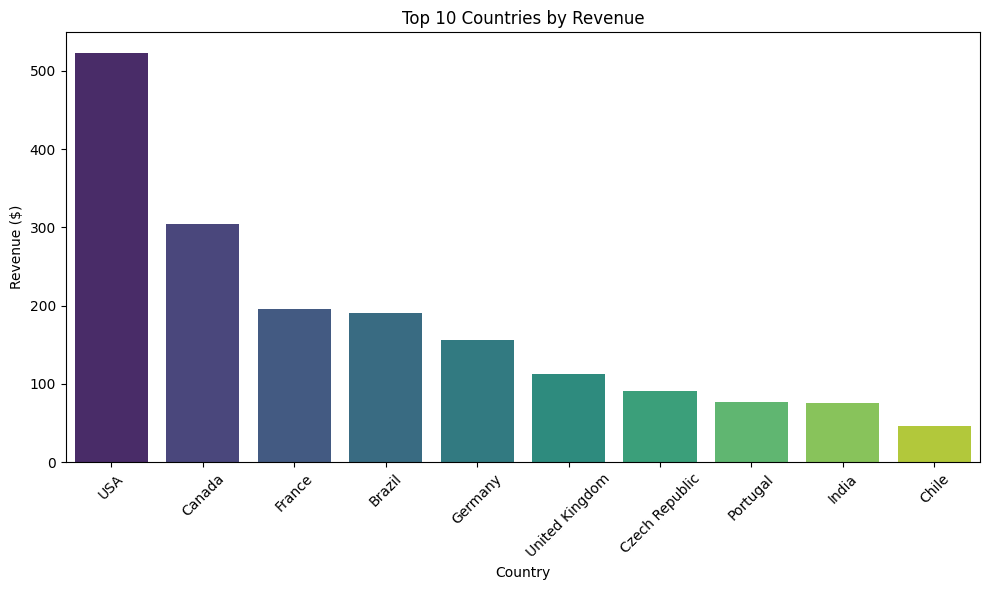

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Selecting top 10 countries
top_countries = revenue_region_df.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='Revenue', data=top_countries, palette='viridis')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Monthly Performance

In [ ]:
monthly_perf_df = pd.read_sql("""
SELECT STRFTIME('%Y-%m', InvoiceDate) AS YearMonth,
       ROUND(SUM(Total), 2) AS Revenue,
       COUNT(InvoiceId) AS Num_Invoices
FROM Invoice
GROUP BY YearMonth
ORDER BY YearMonth;
""", conn)

monthly_perf_df

,YearMonth,Revenue,Num_Invoices
0,2009-01,35.64,6
1,2009-02,37.62,7
2,2009-03,37.62,7
3,2009-04,37.62,7
4,2009-05,37.62,7
5,2009-06,37.62,7
6,2009-07,37.62,7
7,2009-08,37.62,7
8,2009-09,37.62,7
9,2009-10,37.62,7


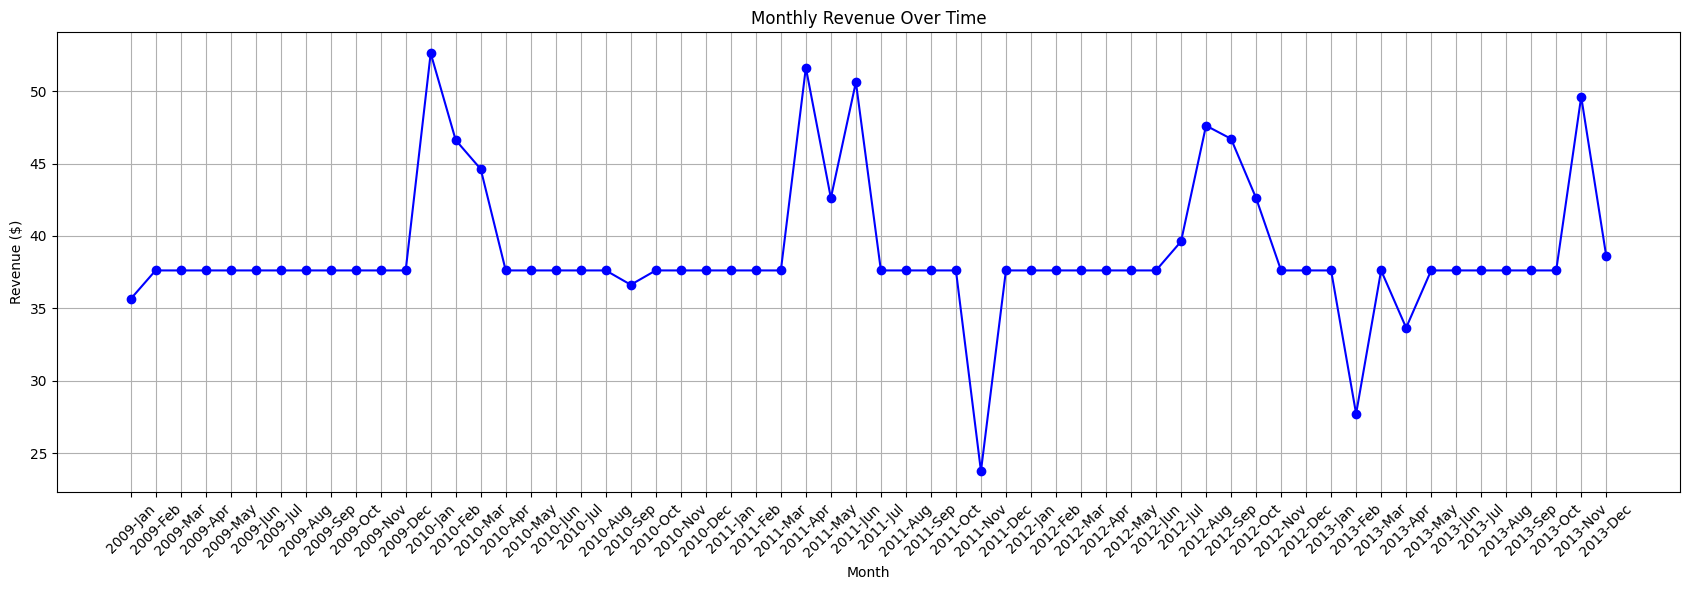

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Converting YearMonth to datetime
monthly_perf_df['YearMonth_dt'] = pd.to_datetime(monthly_perf_df['YearMonth'], format='%Y-%m')
monthly_perf_df['YearMonth_text'] = monthly_perf_df['YearMonth_dt'].dt.strftime('%Y-%b')

plt.figure(figsize=(17,6))
plt.plot(monthly_perf_df['YearMonth_text'], monthly_perf_df['Revenue'], marker='o', color='blue')
plt.title("Monthly Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#Bonus

In [ ]:
top_products_rank_df = pd.read_sql("""
SELECT
    t.Name AS Product,
    SUM(il.Quantity * il.UnitPrice) AS Revenue,
    RANK() OVER (ORDER BY SUM(il.Quantity * il.UnitPrice) DESC) AS Revenue_Rank
FROM InvoiceLine AS il
JOIN Track AS t
    ON il.TrackId = t.TrackId
GROUP BY t.TrackId
ORDER BY Revenue_Rank;
""", conn)

top_products_rank_df

,Product,Revenue,Revenue_Rank
0,The Woman King,3.98,1
1,The Fix,3.98,1
2,Walkabout,3.98,1
3,Hot Girl,3.98,1
4,Gay Witch Hunt,3.98,1
...,...,...,...
1979,Sing Joyfully,0.99,352
1980,"Metopes, Op. 29: Calypso",0.99,352
1981,"Symphony No. 2, Op. 16 - ""The Four Temperamen...",0.99,352
1982,"Étude 1, In C Major - Preludio (Presto) - Liszt",0.99,352


In [ ]:
cumulative_revenue_df = pd.read_sql("""
SELECT
    STRFTIME('%Y-%m', InvoiceDate) AS YearMonth,
    ROUND(SUM(Total), 2) AS Monthly_Revenue,
    ROUND(SUM(SUM(Total)) OVER (ORDER BY STRFTIME('%Y-%m', InvoiceDate)), 2) AS Cumulative_Revenue
FROM Invoice
GROUP BY YearMonth
ORDER BY YearMonth;
""", conn)

cumulative_revenue_df

,YearMonth,Monthly_Revenue,Cumulative_Revenue
0,2009-01,35.64,35.64
1,2009-02,37.62,73.26
2,2009-03,37.62,110.88
3,2009-04,37.62,148.50
4,2009-05,37.62,186.12
5,2009-06,37.62,223.74
6,2009-07,37.62,261.36
7,2009-08,37.62,298.98
8,2009-09,37.62,336.60
9,2009-10,37.62,374.22
